## Practice: Can Santa Deliver?

In this exercise, you'll practice simulating sampling distributions and learn about biased estimators.

### Sampling Distribution of Variance

In this example, we'll simulate a sampling distribution of population variance and sample variance to see how population variance (the sum of squared distances from the mean divided by the sample size) is a biased estimator, whereas sample variance is not.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('The libraries are loaded')

Matplotlib is building the font cache; this may take a moment.


The libraries are loaded


To start, let's simulate a hypothetical population. Imagine that the following population (`pop`) represents the shipping time (in days) for all orders from a popular toy shop. Will these toys get to their destinations on time?

In [2]:
# Create a hypothetical population
np.random.seed(123)
pop = np.round(np.random.gamma(shape=10, scale=1, size=100000),2)

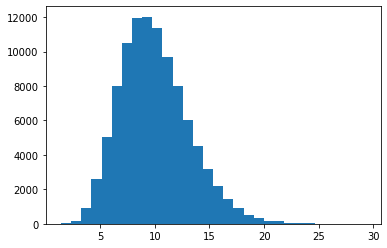

In [3]:
# Visualize the population distribution
plt.hist(pop, bins=30)
plt.show()

Using our population of values, let's calculate the true population variance in shipping times.

In [4]:
# Calculate the variance of the population
true_population_variance = np.var(pop)
true_population_variance

9.925702613193751

Now, let's imagine that we work as an analyst for this toy company and we are interested in understanding how much variation there is in shipping times for our orders. To answer our question, we'll probably start by taking a random sample of orders. 

To start, let's just take a sample of 5 orders so we can inspect them. The code below randomly selects 5 values from our population. If you run the cell a few times, you'll see that you get different samples each time. That's because this is a random process.

In [8]:
# Take a sample of size 5 from the population
s = 5
np.random.choice(pop, s, replace=False)

array([10.16, 16.04, 12.46, 14.25,  3.78])

Now, let's take a new sample of size 5 and calculate the variance of our sample. If our goal is to estimate the variation in the population (using the sample that we actually observed), then we would hope that the sample variance is similar to the population variance.

There are actually two ways to calculate variance: _**Population variance**_ is used to calculate the variance of a population, whereas _**sample variance**_ is used to calculate the variance of a sample. The formula for population variance has a denominator of n (the sample size), whereas sample variance has a denominator of n-1. We can use the `ddof` parameter in the `np.var()` function to specify which one we want to calculate.

Run the cell below a few times to see the sample and population variance for a few different samples of 5 shipping times. Compare those values to the true population variance. Are both values close? Is one consistently closer than the other?

In [27]:
# Take a sample of size 5 and calculate population and sample variance
s = 5
samp = np.random.choice(pop, s, replace=False)
pop_var = np.var(samp, ddof=0)
samp_var = np.var(samp, ddof=1)

print('True population variance: ', true_population_variance)
print('Population variance: ', pop_var)
print('Sample variance: ', samp_var)

True population variance:  9.925702613193751
Population variance:  9.074376
Sample variance:  11.342970000000001


Running a block of code a bunch of times and eyeballing the relationship between three values can only be so useful. Instead, let's leverage the power of Python to repeat this process a large number of times (10000 in the example below) and collect the population and sample variance each time. Then, we can inspect their distribution and compare to the true population variance.

The code below does the following:
- Create two empty lists to store the population and sample variances
- Repeat the following process 10000 times:
  - Take a random sample of 5 shipping times from the population
  - Calculate the population variance for the sample and append it to the list of population variances
  - Calculate the sample variance for the sample and append it to the list of sample variances

In [28]:
# Create a sampling distribution using a for loop
samp_dist_pop_var = []
samp_dist_samp_var = []
s = 5 # sample size
niter = 10000 # number of iterations (any large number works)

for i in range(niter):
    samp = np.random.choice(pop, s, replace=False)
    samp_dist_pop_var.append(np.var(samp, ddof=0))
    samp_dist_samp_var.append(np.var(samp, ddof=1))

Now, let's plot the distribution of population variances for each sample of 5. We've also drawn a red vertical line at the true population variance and a black line at the average population variance for our 10000 random samples. 

Note that the red and black lines are offset from each other. This means that population variance (the formula that we used to calculate the variance of the population, which involved a denominator of n) is a _**biased**_ estimator of the true population variance. In other words, if we calculated the variance of our sample in the same way that we calculated the variance of the full population, we would be underestimating the true variance of shipping times by a little bit (on average). 

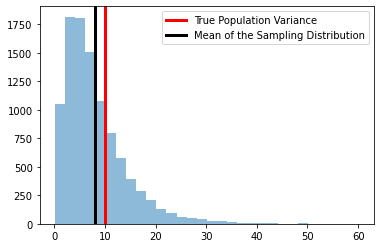

In [29]:
# Plot a histogram of the sampling distribution of population variance
plt.hist(samp_dist_pop_var, bins=30, alpha=.5)
plt.axvline(true_population_variance, 
            color='red', 
            label='True Population Variance', 
            lw=3)
plt.axvline(np.mean(samp_dist_pop_var), 
            color='black', 
            label='Mean of the Sampling Distribution', 
            lw=3)
plt.legend()
plt.show()

However, if we calculate the variance of our sample using the sample variance formula (which has a denominator of n-1), these lines are no longer offset (see below). Thus, sample variance is an _**unbiased**_ estimator of the population variance. 

This is why researchers often calculate sample variance using a slightly different formula! Specifically, if our goal is to use a sample to estimate variation in a population that we can't observe (in this example, that might be because the population includes future orders that we haven't observed yet), we should use the sample variance formula for our estimation.

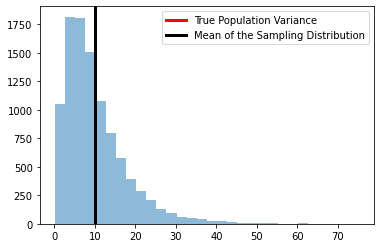

In [30]:
# Plot a histogram of the sampling distribution of sample variance
plt.hist(samp_dist_samp_var, bins=30, alpha=.5)
plt.axvline(true_population_variance, 
            color='red', 
            label='True Population Variance', 
            lw=3)
plt.axvline(np.mean(samp_dist_samp_var), 
            color='black', 
            label='Mean of the Sampling Distribution', 
            lw=3)
plt.legend()
plt.show()

## Practice on Your Own

In this practice, you'll construct a sampling distribution of the maximum and determine whether it is a biased estimator of the population maximum.

#### 1. Calculate the maximum shipping time (the max value in the `pop` array).

In [31]:
# 1
###
pop.max()
###


29.25

#### 2. Using the `pop` array, simulate a sampling distribution of the maximum for a sample size of 10. Use 1000 iterations.

In [33]:
# 2
samp_distr_max = []
###
for iter in range(1000):
    samp = np.random.choice(pop,10,replace = False)
    samp_distr_max.append(samp.max())
###


#### 3. Create a histogram of the simulated sampling distribution. Make sure to add vertical lines at the true population maximum and the mean of the sample maximums. Is the maximum a biased estimator?

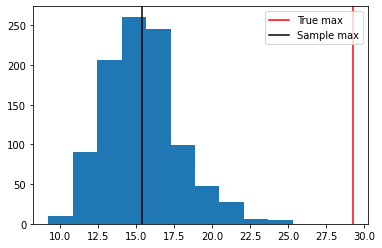

In [50]:
# 3
###
plt.hist(samp_distr_max)
plt.axvline(x = pop.max(),
           color = 'red',
           label = "True max")
plt.axvline(np.mean(samp_distr_max),
           color = 'black',
           label = "Sample max")
plt.legend()
###
